<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:
Parsa hatami
**Student ID**:
400100962

# ****Support Vector Machines****

In this notebook, you will implement SVM for three datasets. You will become more familiar with the Soft-Margin SVM and the Kernel trick, which makes SVM extremely powerful.

Before we start our implementation, you must be comfortable with the theoretical details of the Soft-Margin SVM as an optimization problem and be able to derive the dual formulation for this problem. In the next sections, you will solve the dual optimization problem for all datasets using the CVXPY library, which has been developed for solving convex optimization problems. To get more familiar with CVXPY programming, you can use this [link](https://www.cvxpy.org).

This is the primal formulation for the Soft-Margin SVM for linearly separable data with slack variables $\xi_i \ge 0$:

\begin{equation*}
\begin{aligned}
& {\text{min.}}
& & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{s.t.}
& & y_i(w^T x_i + b) \geq 1 - \xi_i, \; i = 1, \ldots, N \\
& & & \xi_i \geq 0, \; i = 1, \ldots, N
\end{aligned}
\end{equation*}

Where $w$ represents the weight vector, $b$ is the bias term, and $C$ is the regularization parameter controlling the trade-off between a wide margin and misclassification.

**Theoretical Questions:**

1) Derive the dual optimization problem for the Soft-Margin SVM.

2) How do we calculate the weights and bias ($w$ and $b$) using the dual problem optimum points?

3) How do we classify new data points using the optimal weights and bias?

<font color='green'>Write down your answers as markdown here.</font>

**Theoretical Questions:**

1) Derive the dual optimization problem for the Soft-Margin SVM.

To derive the dual optimization problem for the Soft-Margin SVM, we start with the primal problem. The primal optimization problem for the Soft-Margin SVM is:

$$
\min_{\mathbf{w}, b, \xi} \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i 
$$

subject to

$$
y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad i = 1, \ldots, n 
$$

Here, $\mathbf{w}$ is the weight vector, $b$ is the bias, $x_i$ are the slack variables, and $C$ is the penalty parameter.

We form the Lagrangian for this problem:

$$
L(\mathbf{w}, b, \xi, \alpha, \mu) = \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i - \sum_{i=1}^{n} \alpha_i \left[ y_i (\mathbf{w} \cdot \mathbf{x}_i + b) - 1 + \xi_i \right] - \sum_{i=1}^{n} \mu_i \xi_i
$$

where $\alpha_i \geq 0$ and $\mu_i \geq 0$ are the Lagrange multipliers.

To find the dual, we need to minimize $L$ with respect to $\mathbf{w}$, $b$, and $\xi$. Setting the partial derivatives to zero, we get:

$$
\frac{\partial L}{\partial \mathbf{w}} = \mathbf{w} - \sum_{i=1}^{n} \alpha_i y_i \mathbf{x}_i = 0 \quad \Rightarrow \quad \mathbf{w} = \sum_{i=1}^{n} \alpha_i y_i \mathbf{x}_i
$$

$$
\frac{\partial L}{\partial b} = -\sum_{i=1}^{n} \alpha_i y_i = 0 \quad \Rightarrow \quad \sum_{i=1}^{n} \alpha_i y_i = 0
$$

$$
\frac{\partial L}{\partial \xi_i} = C - \alpha_i - \mu_i = 0 \quad \Rightarrow \quad \alpha_i \leq C
$$

Substituting these into the Lagrangian, we obtain the dual problem:

$$
\max_{\alpha} \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j (\mathbf{x}_i \cdot \mathbf{x}_j)
$$

subject to

$$
\sum_{i=1}^{n} \alpha_i y_i = 0, \quad 0 \leq \alpha_i \leq C
$$

2) How do we calculate the weights and bias $(\mathbf{w})$ and $b$ using the dual problem optimum points?

Once we solve the dual problem and obtain the optimum Lagrange multipliers $(\alpha_i^*)$, we can calculate the weights $(\mathbf{w})$ using:

$$
\mathbf{w} = \sum_{i=1}^{n} \alpha_i^* y_i \mathbf{x}_i
$$

To calculate the bias $b$, we can use any support vector $(\mathbf{x}_i, y_i)$ for which $(0 < \alpha_i^* < C)$. For such a support vector, the condition

$$
y_i (\mathbf{w} \cdot \mathbf{x}_i + b) = 1
$$

holds, so we can solve for $b$:

$$
b = y_i - \mathbf{w} \cdot \mathbf{x}_i
$$

3) How do we classify new data points using the optimal weights and bias?

To classify a new data point $(\mathbf{x})$, we use the decision function:

$$
f(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b
$$

The classification of $(\mathbf{x})$ is then given by:

$$
\text{sign}(f(\mathbf{x})) = \text{sign}(\mathbf{w} \cdot \mathbf{x} + b)
$$

If $(f(\mathbf{x}) \geq 0)$, the new data point is classified as positive (class 1). If $(f(\mathbf{x}) < 0)$, it is classified as negative (class -1).




Sometimes, the data is not linearly separable. Therefore, the previous formulation of the Soft-Margin SVM does not give a good accuracy for the classification problem. The Kernel trick is a technique used in such situations. Consider $x$ as your input features with dimension $p$. One can use function $\phi: R^p → R^d$ to map the input features to another space with dimension $d$. Finding good $\phi$ such that data points become near linearly separable makes the previous formulation of the problem and its dual useful by replacing $\phi(x_i)$ for $x_i$ in the problem definition. The function $\phi(x)$ can even be a mapping to an infinite-dimensional space.

If you have found the correct dual form of the Soft-Margin SVM in the previous formulation, you can see that the terms $x_i^T x_j$ will appear in the problem formulation and the prediction rule. These terms will be replaced with $\phi(x_i)^T \phi(x_j)$ when we use $\phi$ as our feature mapping function. Given a feature mapping $\phi$ we define its corresponding **Kernel** to be:

\begin{equation*}
\begin{aligned}
& K(x, z) = \phi(x)^T \phi(z)
\end{aligned}
\end{equation*}

Hence, in the dual optimization problem and the prediction rule of the Soft-Margin SVM, we can replace all terms in the form $x^T z$ with $K(x, z)$. This technique is called the Kernel trick.

Now, given $\phi$, we could easily compute $K(x,z)$ by finding $\phi(x)$ and $\phi(z)$ and taking their inner product. But what’s more interesting is that often, $K(x,z)$ may be very inexpensive to calculate, even though $\phi(x)$ itself may be very expensive to calculate (perhaps because it is an extremely high-dimensional vector). Check Stanford's CS229 [notes](https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf) on SVM and the Kernel trick for more details and examples.

## Libraries

Here are some useful libraries for the implementation. You can add or remove any libraries as you wish. Note that you cannot use sklearn or similar libraries for implementation.

In [3]:
!pip install cvxpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.0/299.0 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 80.0 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.9 MB/s eta 0:00:00


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import cvxpy as cp

## **Dataset Exploration**

In this notebook, you'll be working with three datasets, specifically named "DF1.csv", "DF2.csv", and "DF3.csv". Each dataset entry is composed of a 2-dimensional feature vector and a label, which is either "1" or "-1". The primary objective of this notebook is to leverage SVM to develop a robust classifier for each dataset.

You are given three kernels as follows:



1.   Linear Kernel: $K(x, z) = x^T z$
2.   Polynomial Kernel of degree 2: $K(x, z) = (1 + ∑_{i = 1}^{p} x_i z_i)^2$, where $p$ is the dimension of the feature space.
3.   RBF Kernel: $K(x, z) = e^{-\frac{||x-z||_2^2}{2σ^2}}$

Before implementing, you must choose the correct kernel for each dataset. Note that each kernel must be used exactly for one dataset. Therefore, you cannot use one of the kernels twice. As a part of our grading scheme, what matters with respect to accuracy is the sum of the accuracies you reach for all three datasets, and the accuracy of each model does not have any separate score. Thus, it would help if you chose the most appropriate kernel for each dataset so that all datasets reach a reasonably good accuracy.





Load all datasets and show the first 5 rows of each.

In [8]:
df1 = pd.read_csv('/kaggle/input/dfquestion3/DF1.csv')
display(df1.head())
df2 = pd.read_csv('/kaggle/input/dfquestion3/DF2.csv')
display(df2.head())
df3 = pd.read_csv('/kaggle/input/dfquestion3/DF3.csv')
display(df3.head())

,x1,x2,y
0,6.462652,5.121478,-1
1,-6.586541,-7.721287,1
2,9.239683,-8.595738,-1
3,4.250052,2.143755,1
4,8.219779,-3.609733,-1


,x1,x2,y
0,2.937145,77.102291,1
1,-0.029344,44.802353,1
2,5.868818,44.595757,-1
3,8.609281,49.223945,-1
4,7.763276,-14.340750,-1


,x1,x2,y
0,-0.517768,-0.466158,-1
1,0.940985,0.235175,1
2,-0.470720,0.917120,1
3,0.712716,-0.097401,-1
4,-0.608773,-0.107034,-1


Use the following function to visualize the datapoints for all datasets.

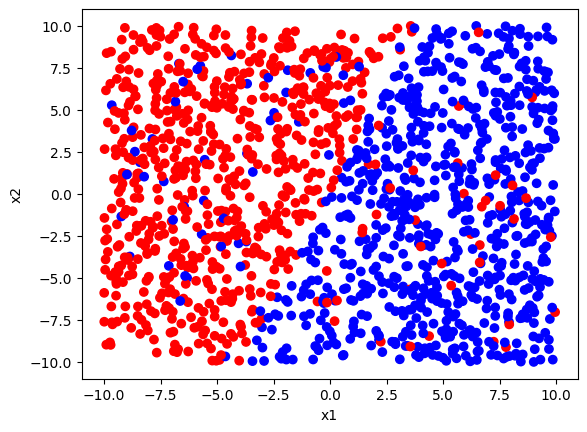

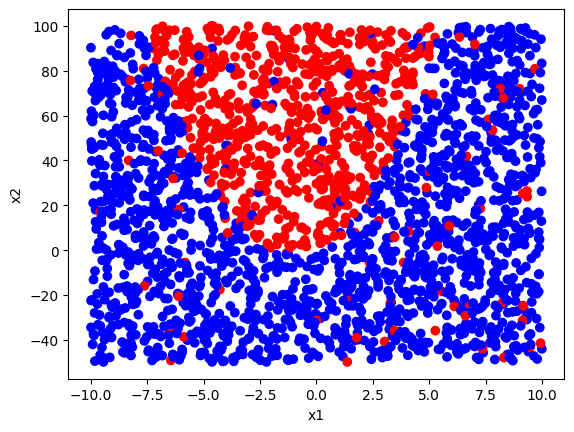

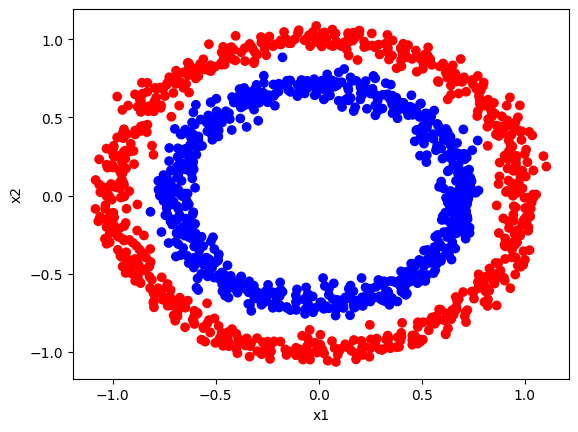

In [9]:
def visualize_data(X, y):
  col = []
  for i in range(len(y)):
    if y[i] == 1:
      col.append('red')
    else:
      col.append('blue')
  plt.scatter(X[ : , 0], X[ : , 1], color = col)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()

X1 = df1[['x1', 'x2']].values
y1 = df1['y'].values
visualize_data(X1, y1)
X2 = df2[['x1', 'x2']].values
y2 = df2['y'].values
visualize_data(X2, y2)
X3 = df3[['x1', 'x2']].values
y3 = df3['y'].values
visualize_data(X3, y3)

**Theoretical Question:**

Which kernel will you use for each dataset? Justify your answer.

Note: your implementation must follow your choice here. Otherwise, you do not recieve any points for your implemetation.

<font color='green'>Write down your answers as markdown here.</font>

Choosing the appropriate kernel for each dataset depends on the distribution and separation of the data points in the feature space. Based on the plots:

DF1:

Kernel Choice: Linear Kernel

Justification: The data points in DF3 appear to be more compact and might be linearly separable. A linear kernel is simple and efficient when the data is linearly separable or close to linearly separable. It avoids the complexity and computational cost associated with non-linear kernels.

DF2:

Kernel Choice: Polynomial Kernel

Justification: The data points in DF2 seem to have a more structured pattern that might be captured well by a polynomial decision boundary. Given the distribution, a polynomial kernel can be useful in finding a non-linear but still relatively smooth and continuous boundary between the classes.

DF3:

Kernel Choice: Radial Basis Function (RBF) Kernel

Justification: The data points in DF1 do not appear to be linearly separable and exhibit a complex pattern. The RBF kernel, also known as the Gaussian kernel, is effective for non-linear separation as it can map the data into a higher-dimensional space where a linear separator can be found.

Summary of Kernels:

RBF Kernel: Effective for complex, non-linear separations.

Polynomial Kernel: Suitable for data with a structured pattern that requires a non-linear but smooth decision boundary.

Linear Kernel: Best for linearly separable data, offering simplicity and efficiency.

## Dataset one (DF1.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [18]:
X1 = df1[['x1', 'x2']].values
y1 = df1['y'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

print("First 5 rows of the scaled training set:")
print(X1_train_scaled[:5])

print("\nFirst 5 rows of the scaled test set:")
print(X1_test_scaled[:5])

print("\nCorresponding labels for the first 5 rows of the training set:")
print(y1_train[:5])

print("\nCorresponding labels for the first 5 rows of the test set:")
print(y1_test[:5])


First 5 rows of the scaled training set:
[[-0.15265259 -0.72296314]
 [-1.4931063   0.899662  ]
 [ 0.28706878 -0.80169001]
 [ 1.44815327 -0.19059604]
 [ 1.42045262 -0.85899903]]

First 5 rows of the scaled test set:
[[ 0.74924746 -0.03198012]
 [ 0.66753886  0.86541616]
 [-0.45579576 -0.95751124]
 [-1.61557761  1.63838093]
 [-0.6125557  -0.61371608]]

Corresponding labels for the first 5 rows of the training set:
[-1  1 -1 -1 -1]

Corresponding labels for the first 5 rows of the test set:
[-1 -1  1  1  1]


Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [30]:
def train_svm(X, y, kernel_function, C=1.0):
    y = y.astype('float64')
    S_matrix = compute_S_matrix(X, kernel_function)
    alphas = solve_dual(S_matrix, y, C)
    b_value = compute_b(X, y, alphas, kernel_function)
    support_vectors = X[alphas > 1e-5]
    weights = compute_weights(X, y, alphas, kernel_function)
    return alphas, b_value, support_vectors, weights, X, y

def compute_b(X, y, alphas, kernel_function):
    b_value = 0
    valid_count = 0
    for i in range(len(alphas)):
        if alphas[i] > 1e-5:  # Small threshold instead of exact zero comparison
            valid_count += 1
            sum2 = 0
            for j in range(len(alphas)):
                sum2 += alphas[j] * y[j] * kernel_function(X[i, :], X[j, :])
            b_value += y[i] - sum2
    b_value /= valid_count
    print("Bias (b):", b_value)
    return b_value

def solve_dual(S_matrix, y, C):
    num_samples = S_matrix.shape[0]
    alpha = cp.Variable(num_samples)
    Y_diag = np.diag(y)
    P_matrix = cp.psd_wrap(Y_diag @ S_matrix @ Y_diag)
    
    objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, P_matrix))
    constraints = [alpha >= 0, alpha <= C, cp.sum(cp.multiply(y, alpha)) == 0]
    problem = cp.Problem(objective, constraints)
    problem.solve()
    
    print("Alphas:", alpha.value)
    return alpha.value

def compute_weights(X, y, alphas, kernel_function):
    weights = np.sum(alphas[:, None] * y[:, None] * X, axis=0)
    print("Weights (w):", weights)
    return weights

def predict_svm(X, alphas, b_value, X_train, y_train, kernel_function):
    predictions = np.zeros(X.shape[0])
    for j in range(X.shape[0]):
        prediction_value = 0
        for i in range(len(alphas)):
            prediction_value += alphas[i] * y_train[i] * kernel_function(X_train[i], X[j])
        predictions[j] = np.sign(prediction_value + b_value)
    return predictions

def compute_S_matrix(X, kernel_function):
    num_samples = X.shape[0]
    S_matrix = np.zeros((num_samples, num_samples))
    for i in range(num_samples):
        for j in range(num_samples):
            S_matrix[i, j] = kernel_function(X[i, :], X[j, :])
    return S_matrix

def linear_kernel(v1, v2):
    return np.dot(v1, v2)


alphas, b_value, support_vectors, weights, X_train, y_train = train_svm(X1_train_scaled, y1_train, linear_kernel, C=1.0)

y_pred = predict_svm(X1_test_scaled, alphas, b_value, X_train, y_train, linear_kernel)

print("Support Vectors:")
print(support_vectors)

Alphas: [ 1.00000000e+00 -2.87955438e-20 -7.16594222e-22 ...  1.00000000e+00
 -1.33518043e-20 -1.71930680e-20]
Bias (b): -0.16219172823842543
Weights (w): [-2.11074894  0.57371719]
Support Vectors:
[[-0.15265259 -0.72296314]
 [-0.55828377 -1.31759686]
 [ 0.22857657 -0.47574752]
 [ 0.46924419  0.52756192]
 [ 0.20318049  1.06492334]
 [ 0.00611474  1.45405703]
 [ 1.21039032  0.20278487]
 [ 0.60417587  1.01946141]
 [-0.07491312  0.93231023]
 [-0.78702027  1.4702921 ]
 [ 0.80379007 -0.73365584]
 [ 0.24778107  0.72915775]
 [-0.16902482 -1.74993068]
 [-1.55412291 -0.65902585]
 [-0.23842279 -1.29232274]
 [-0.24150154  1.12881813]
 [-0.62419984 -0.62749083]
 [-0.4008758  -0.0095192 ]
 [-0.56517366 -1.04014909]
 [ 1.08992562 -0.72134088]
 [-0.07282271 -0.41171826]
 [ 0.70796021 -1.50214695]
 [-0.36980566 -1.63121858]
 [ 0.09298536  1.13596609]
 [-0.71796055 -0.76567257]
 [-0.12912142  1.00853188]
 [ 1.10554453 -0.13143378]
 [-0.40834387 -0.38101244]
 [ 0.05927211  1.26114496]
 [-0.60888759 -0.56

Predict the class of each entry in the test set using your learned model.

In [31]:
y_pred = predict_svm(X1_test_scaled, alphas, b_value, X1_train_scaled, y1_train, linear_kernel)

print("Predicted classes for the test set:")
print(y_pred)

Predicted classes for the test set:
[-1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1.
  1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.
 -1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1.
  1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.
  1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1. -1.  1. -1.
  1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1. -1.  1.
 -1. -1.  1. -1.  1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.
  1. -1.  1.  1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1.  1. -1. -1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1.  1.
  1. -1. -1.  1.  1.  1.  1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1.  1.
 -1.  1.  1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1.  1.  1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1.
  1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1.
 -1. -1. -1. -1

Use classification_report function (from sklearn) to get the accuracy of your model.

Classification Report:
              precision    recall  f1-score   support

          -1       0.92      0.93      0.92       148
           1       0.93      0.92      0.92       148

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



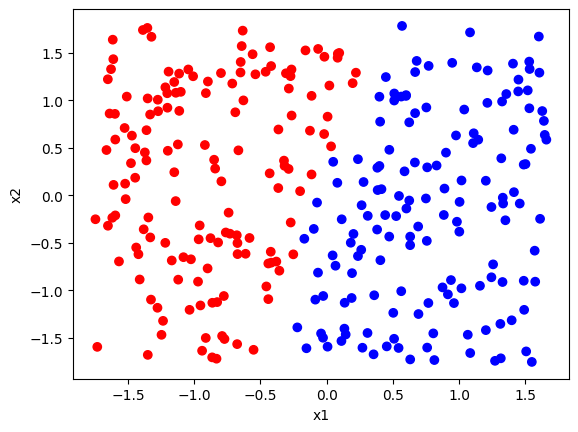

In [33]:
report = classification_report(y1_test, y_pred)
print("Classification Report:")
print(report)

visualize_data(X1_test_scaled, y_pred)

## Dataset two (DF2.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [35]:
X2 = df2[['x1', 'x2']].values
y2 = df2['y'].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

print("First 5 rows of the scaled training set:")
print(X2_train_scaled[:5])

print("\nFirst 5 rows of the scaled test set:")
print(X2_test_scaled[:5])

print("\nCorresponding labels for the first 5 rows of the training set:")
print(y2_train[:5])

print("\nCorresponding labels for the first 5 rows of the test set:")
print(y2_test[:5])

First 5 rows of the scaled training set:
[[-0.79640102  0.90567901]
 [-0.6732123   0.48487136]
 [-0.26182356  1.13566123]
 [ 0.22788566 -1.42430894]
 [ 0.4074034  -0.51340748]]

First 5 rows of the scaled test set:
[[-0.80052795 -1.70467029]
 [-1.21866022  0.01471222]
 [ 1.69242832  0.85374327]
 [ 1.4230511   0.97593577]
 [-1.5420003   0.78044475]]

Corresponding labels for the first 5 rows of the training set:
[ 1 -1  1 -1 -1]

Corresponding labels for the first 5 rows of the test set:
[-1 -1 -1 -1 -1]


Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [36]:
def train_svm(X, y, kernel_function, C=1.0):
    y = y.astype('float64')
    S_matrix = compute_S_matrix(X, kernel_function)
    alphas = solve_dual(S_matrix, y, C)
    b_value = compute_b(X, y, alphas, kernel_function)
    support_vectors = X[alphas > 1e-5]
    weights = compute_weights(X, y, alphas, kernel_function)
    return alphas, b_value, support_vectors, weights, X, y

def compute_b(X, y, alphas, kernel_function):
    b_value = 0
    valid_count = 0
    for i in range(len(alphas)):
        if alphas[i] > 1e-5:  # Small threshold instead of exact zero comparison
            valid_count += 1
            sum2 = 0
            for j in range(len(alphas)):
                sum2 += alphas[j] * y[j] * kernel_function(X[i, :], X[j, :])
            b_value += y[i] - sum2
    b_value /= valid_count
    print("Bias (b):", b_value)
    return b_value

def solve_dual(S_matrix, y, C):
    num_samples = S_matrix.shape[0]
    alpha = cp.Variable(num_samples)
    Y_diag = np.diag(y)
    P_matrix = cp.psd_wrap(Y_diag @ S_matrix @ Y_diag)
    
    objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, P_matrix))
    constraints = [alpha >= 0, alpha <= C, cp.sum(cp.multiply(y, alpha)) == 0]
    problem = cp.Problem(objective, constraints)
    problem.solve()
    
    print("Alphas:", alpha.value)
    return alpha.value

def compute_weights(X, y, alphas, kernel_function):
    weights = np.sum(alphas[:, None] * y[:, None] * X, axis=0)
    print("Weights (w):", weights)
    return weights

def predict_svm(X, alphas, b_value, X_train, y_train, kernel_function):
    predictions = np.zeros(X.shape[0])
    for j in range(X.shape[0]):
        prediction_value = 0
        for i in range(len(alphas)):
            prediction_value += alphas[i] * y_train[i] * kernel_function(X_train[i], X[j])
        predictions[j] = np.sign(prediction_value + b_value)
    return predictions

def compute_S_matrix(X, kernel_function):
    num_samples = X.shape[0]
    S_matrix = np.zeros((num_samples, num_samples))
    for i in range(num_samples):
        for j in range(num_samples):
            S_matrix[i, j] = kernel_function(X[i, :], X[j, :])
    return S_matrix

def polynomial_kernel(v1, v2, degree=3, coef0=1):
    return (np.dot(v1, v2) + coef0) ** degree

alphas, b_value, support_vectors, weights, X_train, y_train = train_svm(X2_train_scaled, y2_train, polynomial_kernel, C=1.0)

y_pred = predict_svm(X2_test_scaled, alphas, b_value, X_train, y_train, polynomial_kernel)

print("Support Vectors:")
print(support_vectors)

Alphas: [ 1.57319740e-19  1.00000000e+00 -7.09200168e-20 ...  8.34032070e-20
 -1.41042828e-19 -1.33516802e-19]
Bias (b): 1.2575667826252093
Weights (w): [-0.52227137  0.7202639 ]
Support Vectors:
[[-6.73212300e-01  4.84871358e-01]
 [ 4.07403403e-01 -5.13407480e-01]
 [-9.65518748e-01  7.39862014e-01]
 [-9.42512714e-01  5.64410730e-01]
 [-9.28621679e-01  7.61751033e-01]
 [ 8.43087744e-01  1.01561742e+00]
 [-6.11802005e-01 -4.80176416e-01]
 [ 2.22015318e-01  7.29581064e-02]
 [-1.22974267e+00  1.48358697e+00]
 [-1.28047649e+00  1.41137819e+00]
 [-1.95995080e-01  1.37549891e+00]
 [-1.10214124e+00  1.06969048e+00]
 [-8.48022169e-01 -2.06786133e-01]
 [ 3.43127505e-01 -6.53894762e-02]
 [ 1.62354559e+00 -1.63435471e+00]
 [ 8.39032296e-01  6.76178544e-01]
 [ 8.72787321e-01  2.19190544e-01]
 [ 7.70966332e-01  7.54348201e-01]
 [-3.09158151e-01  1.14217710e+00]
 [ 8.08097934e-01  1.63926378e+00]
 [ 7.73816410e-01  4.70432407e-01]
 [ 1.51421393e-01  3.27093618e-02]
 [ 7.80102325e-01  1.49819607e+00]

Predict the class of each entry in the test set using your learned model.

In [37]:
print("Predicted classes for the test set:")
print(y_pred)

Predicted classes for the test set:
[-1. -1. -1. -1. -1. -1.  1. -1.  1.  1. -1.  1. -1. -1. -1. -1. -1. -1.
 -1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1. -1.  1.
  1.  1. -1. -1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1.  1.
 -1.  1. -1.  1.  1.  1.  1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1.
 -1. -1.  1.  1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1. -1.
 -1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1. -1.  1.
 -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1.
 -1.  1.  1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1.  1. -1.  1. -1.
 -1. -1. -1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1. -1. -1. -1. -1.
  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1.  1.  1.  1. -1.
 -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1. -1.  1. -1. -1. -1.
 -1. -1. -1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1.
 -1. -1. -1. -1

Use classification_report function (from sklearn) to get the accuracy of your model.

Classification Report:
              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       336
           1       0.89      0.89      0.89       160

    accuracy                           0.93       496
   macro avg       0.92      0.92      0.92       496
weighted avg       0.93      0.93      0.93       496



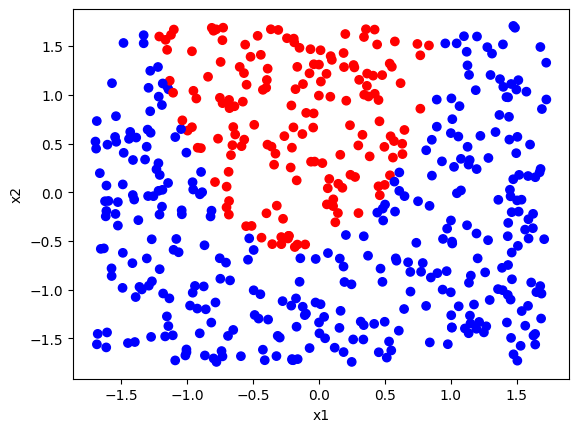

In [38]:
report = classification_report(y2_test, y_pred)
print("Classification Report:")
print(report)

visualize_data(X2_test_scaled, y_pred)

## Dataset three (DF3.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [39]:
X3 = df3[['x1', 'x2']].values
y3 = df3['y'].values

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

scaler = StandardScaler()
X3_train_scaled = scaler.fit_transform(X3_train)
X3_test_scaled = scaler.transform(X3_test)

print("First 5 rows of the scaled training set:")
print(X3_train_scaled[:5])

print("\nFirst 5 rows of the scaled test set:")
print(X3_test_scaled[:5])

print("\nCorresponding labels for the first 5 rows of the training set:")
print(y3_train[:5])

print("\nCorresponding labels for the first 5 rows of the test set:")
print(y3_test[:5])

First 5 rows of the scaled training set:
[[-0.14222561  1.18822545]
 [-1.69900718  0.47652007]
 [-0.86483292 -0.48534641]
 [-0.10909031  1.15751603]
 [ 0.18001078 -1.10248449]]

First 5 rows of the scaled test set:
[[ 1.63174158 -0.58751332]
 [-1.48344872 -0.74041537]
 [ 0.10504168  1.71150921]
 [-0.69623543  1.01088439]
 [ 0.72206227 -0.90556892]]

Corresponding labels for the first 5 rows of the training set:
[-1  1 -1 -1 -1]

Corresponding labels for the first 5 rows of the test set:
[ 1  1  1 -1 -1]


Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [40]:
def train_svm(X, y, kernel_function, C=1.0):
    y = y.astype('float64')
    S_matrix = compute_S_matrix(X, kernel_function)
    alphas = solve_dual(S_matrix, y, C)
    b_value = compute_b(X, y, alphas, kernel_function)
    support_vectors = X[alphas > 1e-5]
    weights = compute_weights(X, y, alphas, kernel_function)
    return alphas, b_value, support_vectors, weights, X, y

def compute_b(X, y, alphas, kernel_function):
    b_value = 0
    valid_count = 0
    for i in range(len(alphas)):
        if alphas[i] > 1e-5:  
            valid_count += 1
            sum2 = 0
            for j in range(len(alphas)):
                sum2 += alphas[j] * y[j] * kernel_function(X[i, :], X[j, :])
            b_value += y[i] - sum2
    b_value /= valid_count
    print("Bias (b):", b_value)
    return b_value

def solve_dual(S_matrix, y, C):
    num_samples = S_matrix.shape[0]
    alpha = cp.Variable(num_samples)
    Y_diag = np.diag(y)
    P_matrix = cp.psd_wrap(Y_diag @ S_matrix @ Y_diag)
    
    objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, P_matrix))
    constraints = [alpha >= 0, alpha <= C, cp.sum(cp.multiply(y, alpha)) == 0]
    problem = cp.Problem(objective, constraints)
    problem.solve()
    
    print("Alphas:", alpha.value)
    return alpha.value

def compute_weights(X, y, alphas, kernel_function):
    weights = np.sum(alphas[:, None] * y[:, None] * X, axis=0)
    print("Weights (w):", weights)
    return weights

def predict_svm(X, alphas, b_value, X_train, y_train, kernel_function):
    predictions = np.zeros(X.shape[0])
    for j in range(X.shape[0]):
        prediction_value = 0
        for i in range(len(alphas)):
            prediction_value += alphas[i] * y_train[i] * kernel_function(X_train[i], X[j])
        predictions[j] = np.sign(prediction_value + b_value)
    return predictions

def compute_S_matrix(X, kernel_function):
    num_samples = X.shape[0]
    S_matrix = np.zeros((num_samples, num_samples))
    for i in range(num_samples):
        for j in range(num_samples):
            S_matrix[i, j] = kernel_function(X[i, :], X[j, :])
    return S_matrix

def rbf_kernel(v1, v2, gamma=0.1):
    return np.exp(-gamma * np.linalg.norm(v1 - v2) ** 2)

alphas, b_value, support_vectors, weights, X_train, y_train = train_svm(X3_train_scaled, y3_train, rbf_kernel, C=1.0)

y_pred = predict_svm(X3_test_scaled, alphas, b_value, X_train, y_train, rbf_kernel)

print("Support Vectors:")
print(support_vectors)

Alphas: [ 1.00000000e+00  3.22735853e-19 -8.19775481e-20 ...  1.92653433e-19
  4.62588121e-19  1.00000000e+00]
Bias (b): 8.806157480625675
Weights (w): [ 0.35368931 -0.07956228]
Support Vectors:
[[-0.14222561  1.18822545]
 [-0.22972697 -1.19877723]
 [-0.8639335   1.2814454 ]
 [-0.82165019  0.99410032]
 [ 1.02603339  0.64921501]
 [ 0.29784346 -1.15652853]
 [ 0.94313494  0.73303058]
 [-1.55520626 -0.01689269]
 [ 1.20694291  0.17554562]
 [ 0.82394075 -0.87405383]
 [-1.5047412   0.52714533]
 [ 0.73658006  1.02987093]
 [ 1.03863493 -0.63546881]
 [-1.32387735  0.4128639 ]
 [-0.49181771  1.07641242]
 [-0.98650551  1.20502069]
 [ 0.89077317  0.79676209]
 [ 0.29607206  1.17957331]
 [-0.3378059   1.13231678]
 [ 1.55394622 -0.12124842]
 [-1.25122791  0.08783556]
 [-1.04222607 -0.71009022]
 [-0.67032285  1.39055636]
 [-0.24946787  1.16702793]
 [-1.08712859 -0.5542034 ]
 [-0.54269111 -1.2063896 ]
 [ 0.65555914 -1.43453387]
 [ 1.53793094  0.11672736]
 [ 1.43366033  0.60764796]
 [ 1.15239694 -0.39399

Predict the class of each entry in the test set using your learned model.

In [41]:
print("Predicted classes for the test set:")
print(y_pred)

Predicted classes for the test set:
[ 1.  1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1.  1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1. -1.  1. -1.
 -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1.
  1.  1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1. -1.  1.  1. -1. -1.
 -1. -1. -1.  1.  1. -1. -1.  1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1.
  1.  1.  1.  1. -1.  1.  1. -1. -1. -1. -1.  1. -1.  1. -1.  1. -1. -1.
 -1. -1.  1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1. -1.
 -1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1.  1.
 -1. -1. -1. -1.  1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1. -1.
  1. -1. -1.  1. -1. -1. -1.  1.  1. -1.  1.  1. -1. -1.  1.  1.  1. -1.
  1.  1. -1.  1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.
 -1.  1.  1.  1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1.
  1. -1.  1.  1

Use classification_report function (from sklearn) to get the accuracy of your model.

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       140

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292



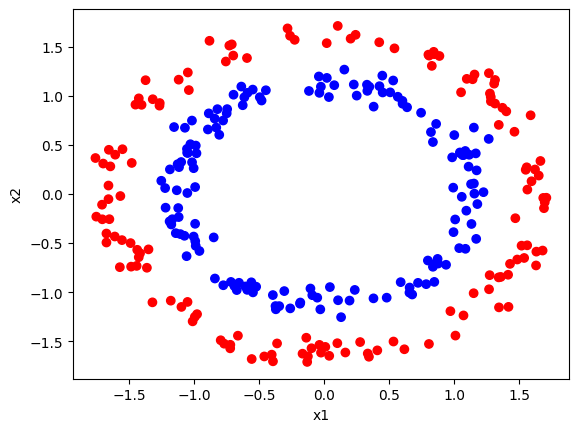

In [42]:
report = classification_report(y3_test, y_pred)
print("Classification Report:")
print(report)

visualize_data(X3_test_scaled, y_pred)